<a href="https://colab.research.google.com/github/blacksaturn1/RL_BanditsProblem/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

Figure 2.2 compares a greedy method with two ε-greedy methods (ε = 0.01 and ε = 0.1), as described above, on the 10-armed testbed. All the methods formed their action-value estimates using the sample-average technique. The upper graph shows the increase in expected reward with experience. The greedy method improved slightly faster than the other methods at the very beginning, but then leveled off at a lower level. It achieved a reward-per-step of only about 1, compared with the best possible of about 1.55 on this testbed. The greedy method performed significantly worse in the long run because it often got stuck performing suboptimal actions. The lower graph shows that the greedy method found the optimal action in only approximately one-third of the tasks. In the other two-thirds, its initial samples of the optimal action were disappointing, and it never returned to it. The ε-greedy methods eventually performed better because they continued to explore and to improve their chances of recognizing the optimal action. The ε = 0.1 method explored more, and usually found the optimal action earlier, but it never selected that action more than 91% of the time. The ε = 0.01 method improved more slowly, but eventually would perform better than the ε = 0.1 method on both performance measures shown in the figure. It is also possible to reduce ε over time to try to get the best of both high and low values.

Sutton, Richard S.; Barto, Andrew G.. Reinforcement Learning, second edition (Adaptive Computation and Machine Learning series) (pp. 29-30). MIT Press. Kindle Edition.

# Methods

Create methods to perform steps per run, for many runs, per given epsilon algorithm

In [ ]:
def sample_running_average(current_reward,current_average,previous_step):
  current_step=previous_step+1
  new_average = current_average + 1.0/current_step*(current_reward-current_average)
  return (new_average,current_step)

In [ ]:
import numpy as np
def randomReward(mu,sigma,iterations):
  R_t=np.random.default_rng().normal(mu, sigma, iterations)
  return R_t

In [ ]:
def bandit(action,q_a,debug):
  if(debug):
    print("<action, type>",action,type(action))
  R_t = randomReward(q_a,1,1)
  return R_t[0]


In [ ]:
def createBanditsProblem(kArms,problem_iterations):
  # Make q(a) for each problem
  q_a = []
  mu, sigma = 0, 1 # mean and standard deviation
  for x in range(kArms):
    q_a.append(np.random.default_rng().normal(mu, sigma, problem_iterations))
  return q_a


q_a_test = createBanditsProblem(10,2)
print(q_a_test[0][0])

-0.595940638488268


In [ ]:

import numpy as np
import random

def kArmedBanditSimulation(banditSimNumber,kArms,q_a,epsilon,steps,debug):

  Q_a = [0 for x in range(kArms)]
  N_a = [0 for x in range(kArms)]
  population = [0, 1]
  randomAction_weights = [1-epsilon, epsilon]

  # average rewards
  R_t_perStep=[]
  optimalActionSelectedForStep_perStep=[]
  qa_max_value=-1
  qa_max_action=-1

  for x in range(kArms):
    if(qa_max_value < q_a[x][banditSimNumber]):
      qa_max_value = q_a[x][banditSimNumber]
      qa_max_action=x

  for t in range(steps):
    # choose action
    isRandomAction=choices(population, randomAction_weights)[0]
    if(debug):
      print("Is Random Action?", isRandomAction)

    if(isRandomAction):
      action = random.randint(0, 9)
      if(debug):
        print('Random action:',action)
    else:
      action_value_max = max(Q_a)
      if(debug):
          print("Max value action:",action_value_max)
      # Select actions which have max value randomly
      matchingActionValues = [x for x in Q_a if x==action_value_max ]
      if(debug):
          print("matchingActionValues",matchingActionValues)
      if(len(matchingActionValues)>1):
        nMatch = random.randint(0, len(matchingActionValues))
        pos = 0
        if(debug):
          print("nMatch",nMatch)
        for n in range(nMatch+1):
          pos = Q_a.index(action_value_max)
          action = pos
          if(debug):
            print("a1",action)
      else:
        action = Q_a.index(matchingActionValues[0])
        if(debug):
            print("a2",action)
      if(debug):
          print('Action selected:',action)

    R_t = bandit(action,q_a[action][banditSimNumber],debug)
    if(debug):
      print("bandit() results R_t: ",R_t)
    Q_a[action],N_a[action] = sample_running_average(R_t,Q_a[action],N_a[action])
    if(debug):
       print("Action Value, Count",Q_a[action],N_a[action])
    R_t_perStep.append(R_t)
    optimalActionSelectedForStep=0
    if(action == qa_max_action):
      optimalActionSelectedForStep=1
    optimalActionSelectedForStep_perStep.append(optimalActionSelectedForStep)
  return q_a , Q_a, N_a,R_t_perStep, optimalActionSelectedForStep_perStep

In [ ]:
import matplotlib.pyplot as plt

def runSimulations(kArms, runs, steps, epsilon=[]):
  kArms, runs, steps, epsilon=kArms, runs, steps, epsilon
  label=''
  x_plot = [x for x in range(1,steps+1)]
  # Initialise the subplot function using number of rows and columns
  figure, axis = plt.subplots(2, 1)

  for e in epsilon:
    R_t_avgRun_perStep=[0 for x in range(steps)]
    accuracyCount_sumOfRuns_perStep=[0 for x in range(steps)]
    accuracy_perStep=[0 for x in range(steps)]
    for r in range(runs):
      qa, Qa, Na,Rt_perStep,optimalActionSelectedForStep_perStep = kArmedBanditSimulation(r,kArms,q_a,e,steps,debug)
      if(debug):
        print("Run #",r)
        print("Rt_perStep",len(Rt_perStep))
      for step in range(len(Rt_perStep)):
          if(debug):
            print("B",R_t_avgRun_perStep)
          n=r+1
          R_t_avgRun_perStep[step],_ = sample_running_average(Rt_perStep[step],R_t_avgRun_perStep[step],n)
          #accuracy_avgRun_perStep[step],_ = sample_running_average(optimalActionSelectedForStep_perStep[step]/100.0,accuracy_avgRun_perStep[step],n)
          accuracyCount_sumOfRuns_perStep[step] += optimalActionSelectedForStep_perStep[step]
          if(debug):
            print("A",R_t_avgRun_perStep)
    accuracy_perStep = [ accuracyCount_sumOfRuns_perStep[x]/runs*1.0 for x in range(len(accuracyCount_sumOfRuns_perStep)) ]
    if e==0:
      label = "E={} (greedy)".format(e)
    else:
      label = "E={}".format(e)
    print("Completed epsilon:",e)
    axis[0].plot(x_plot, R_t_avgRun_perStep, label=label)
    axis[1].plot(x_plot, accuracy_perStep, label=label)

  axis[0].plot()
  axis[0].set_xlabel("Steps")
  axis[0].set_ylabel("Average reward")
  axis[0].set_title("10 Armed Test Bed")
  axis[0].legend()

  axis[1].plot()
  axis[1].set_xlabel("Steps")
  axis[1].set_ylabel("% Optimal Action")
  axis[1].legend()


  return

# Simulation

Run 10 Armed Bandit for 2000 runs per epsilon with each having 2000 steps

Completed epsilon: 0.0
Completed epsilon: 0.1
Completed epsilon: 0.01


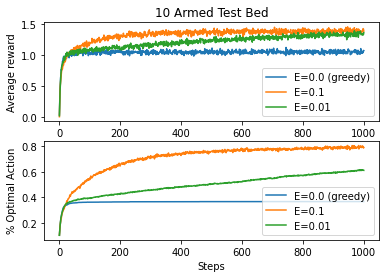

In [ ]:
debug=False
kArms, runs, steps, epsilon=10,2000,1000,[0.0,0.1,0.01]
q_a=createBanditsProblem(kArms,runs)
runSimulations(kArms, runs, steps, epsilon=epsilon)

# Helpers

In [ ]:
total = 0
[total := total + x for x in [1, 2, 3, 4, 5]]
print(total)
total = [x for x in [1, 2, 3, 4, 5]]
print(total)
sum(total)

15
[1, 2, 3, 4, 5]


15

In [ ]:
from random import choices
def testStochasticOutcomes():
  population = [0, 1]
  action1_weights = [0.8, 0.2]
  action2_weights = [0.9, 0.1]
  action1_reward=choices(population, action1_weights)
  action2_reward=choices(population, action2_weights)
  print(action1_reward[0])
  print(action2_reward[0])